In [2]:
pip install numpy pandas librosa IPython matplotlib tensorflow tqdm


  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp39-cp39-win_amd64.whl (272.8 MB)
     ---------------------------------------- 1.3/1.3 MB 1.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
     ---------------------------------------- 4.2/4.2 MB 2.0 MB/s eta 0:00:00
  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached keras-2.12

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\My PC\\anaconda3\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [4]:
pip install --user numpy pandas librosa IPython matplotlib tensorflow tqdm


Note: you may need to restart the kernel to use updated packages.


In [1]:

import os
import numpy as np
import pandas as pd
import librosa as lb
import IPython.display as ipd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm

In [12]:
metadata = pd.read_csv(r"..\UrbanSound\UrbanSound8K.csv")

print(metadata.shape)
metadata.head()

(8732, 8)


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [13]:
classes = metadata.groupby('classID')['class'].unique()
classes

classID
0     [air_conditioner]
1            [car_horn]
2    [children_playing]
3            [dog_bark]
4            [drilling]
5       [engine_idling]
6            [gun_shot]
7          [jackhammer]
8               [siren]
9        [street_music]
Name: class, dtype: object

In [36]:
# import lb.feature as lf

# def feature_extractor(path):
#     data, sample_rate = librosa.load(path)
#     mfccs = lf.mfcc(y=data, sr=sample_rate, n_mfcc=128)
#     mfccs_mean = np.mean(mfccs, axis=1)
#     return mfccs_mean
def feature_extractor(path):
    data, simple_rate = lb.load(path)
    data = lb.feature.mfcc(y=data,n_mfcc=128)
    data = np.mean(data,axis=1)
    return data

In [37]:
x, y = [], []
for i,rows in tqdm(metadata.iterrows()):
    path = '../UrbanSound/' + 'fold' + str(rows['fold']) + '/' + str(rows['slice_file_name'])
    x.append(feature_extractor(path))
    y.append(rows['classID'])
x = np.array(x)
y = np.array(y)
x.shape, y.shape

3555it [01:11, 48.63it/s]C:\Users\My PC\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8321it [02:47, 57.78it/s]C:\Users\My PC\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8329it [02:47, 62.31it/s]C:\Users\My PC\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [02:55, 49.71it/s]


((8732, 128), (8732,))

In [38]:
y = to_categorical(y)
y.shape

(8732, 10)

In [39]:
xtrainval, xtest, ytrainval, ytest = train_test_split(x,y,test_size=0.1,stratify=y,random_state=387)
xtrain, xvalid, ytrain, yvalid = train_test_split(xtrainval,ytrainval,test_size=0.2,stratify=ytrainval,random_state=387)
print('\nNumber of samples for Train set :',xtrain.shape[0])
print('Number of samples for Validation set :',xvalid.shape[0])
print('Number of samples for Test set :',xtest.shape[0])


Number of samples for Train set : 6286
Number of samples for Validation set : 1572
Number of samples for Test set : 874


In [40]:
model = Sequential(
                        [
                            layers.Dense(1000,activation='relu',input_shape=(128,)),
                            layers.Dense(750,activation='relu'),
                            layers.Dense(500,activation='relu'),
                            layers.Dense(250,activation='relu'),
                            layers.Dense(100,activation='relu'),
                            layers.Dense(50,activation='relu'),
                            layers.Dense(10,activation='softmax')
                        ]
                   )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              129000    
                                                                 
 dense_1 (Dense)             (None, 750)               750750    
                                                                 
 dense_2 (Dense)             (None, 500)               375500    
                                                                 
 dense_3 (Dense)             (None, 250)               125250    
                                                                 
 dense_4 (Dense)             (None, 100)               25100     
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 10)                5

In [41]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
training = model.fit(xtrain,ytrain,validation_data=(xvalid,yvalid),epochs=20)

Epoch 1/20
197/197 [==============================] - 6s 25ms/step - loss: 1.9935 - accuracy: 0.3948 - val_loss: 1.3004 - val_accuracy: 0.5719
Epoch 2/20
197/197 [==============================] - 5s 24ms/step - loss: 1.0324 - accuracy: 0.6689 - val_loss: 0.9659 - val_accuracy: 0.7074
Epoch 3/20
197/197 [==============================] - 5s 24ms/step - loss: 0.7380 - accuracy: 0.7634 - val_loss: 0.7648 - val_accuracy: 0.7545
Epoch 4/20
197/197 [==============================] - 5s 25ms/step - loss: 0.5360 - accuracy: 0.8301 - val_loss: 0.6353 - val_accuracy: 0.8136
Epoch 5/20
197/197 [==============================] - 5s 25ms/step - loss: 0.4106 - accuracy: 0.8689 - val_loss: 0.5134 - val_accuracy: 0.8365
Epoch 6/20
197/197 [==============================] - 5s 25ms/step - loss: 0.3348 - accuracy: 0.8909 - val_loss: 0.5381 - val_accuracy: 0.8352
Epoch 7/20
197/197 [==============================] - 5s 25ms/step - loss: 0.2902 - accuracy: 0.9022 - val_loss: 0.5171 - val_accuracy: 0.8550

In [42]:
train_hist = pd.DataFrame(training.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,1.993479,0.394846,1.300429,0.571883
1,1.032406,0.668947,0.965882,0.707379
2,0.738014,0.763443,0.764768,0.754453
3,0.535977,0.830099,0.635252,0.813613
4,0.410552,0.868915,0.513375,0.836514
5,0.334842,0.890869,0.538142,0.835242
6,0.290246,0.902164,0.517132,0.854962
7,0.261137,0.915845,0.479430,0.858779
8,0.227685,0.925708,0.448011,0.872137
9,0.208214,0.934935,0.411359,0.891221


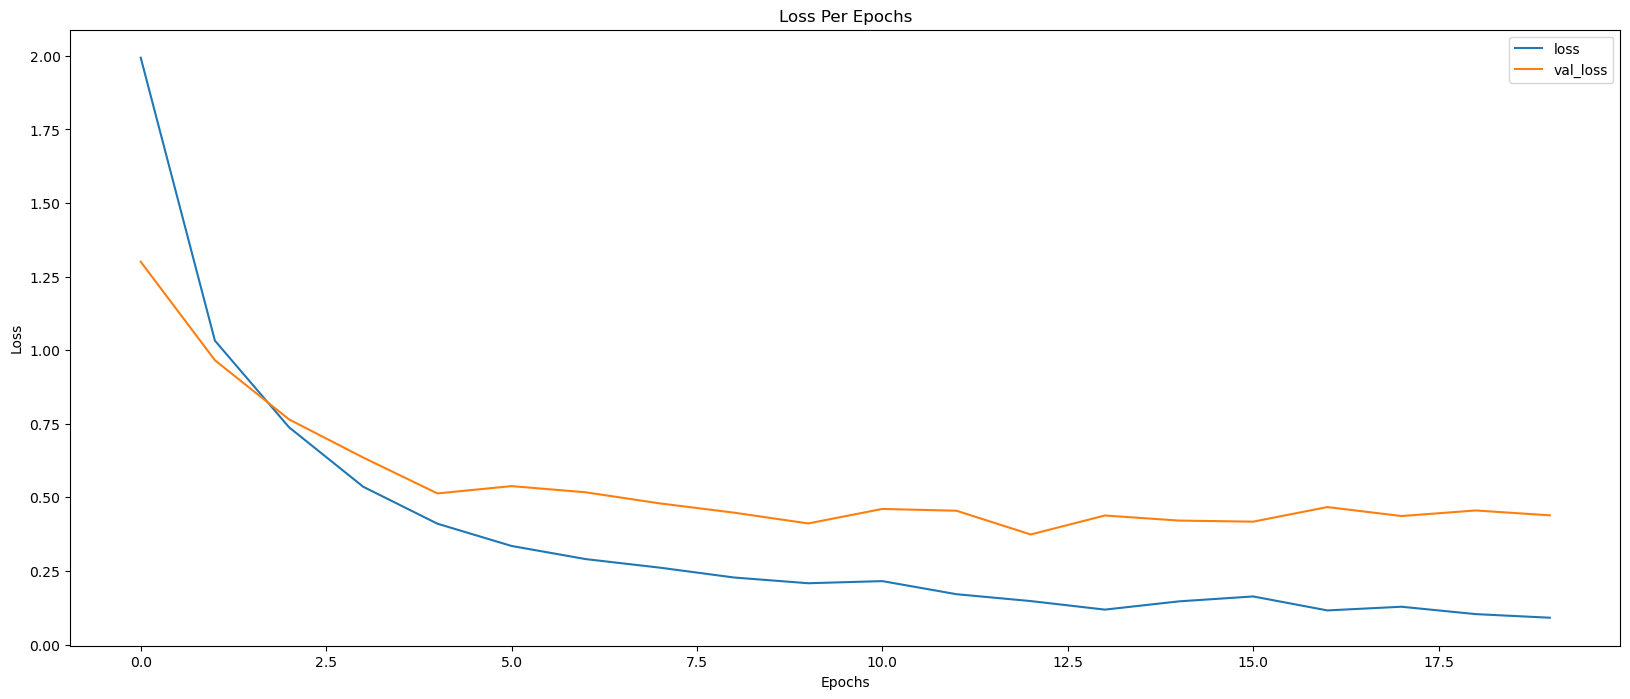

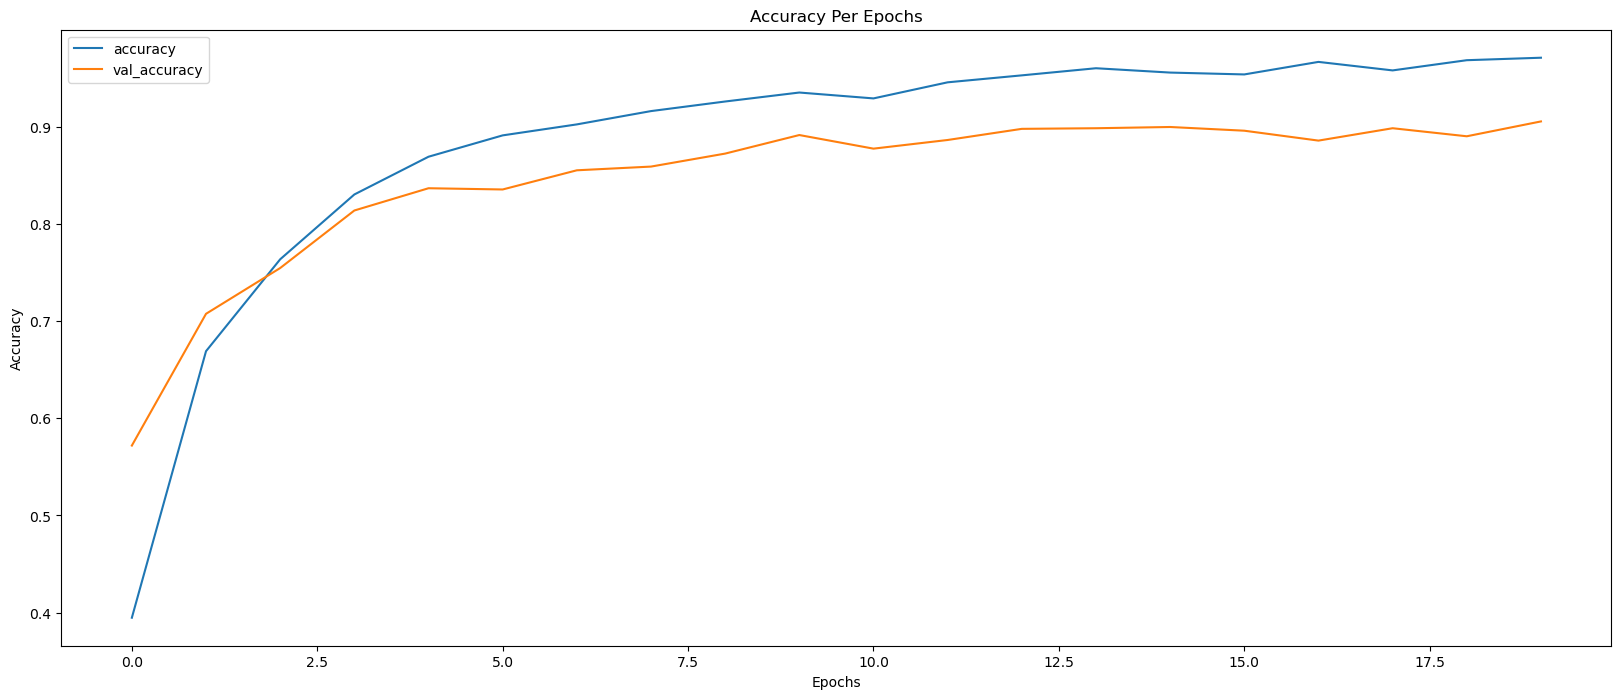

In [43]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['loss','val_loss'])
plt.title('Loss Per Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy Per Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [45]:
ytrue = np.argmax(ytest,axis=1)
ypred = np.argmax(model.predict(xtest),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))

28/28 [==============================] - 0s 4ms/step

Confusion Matrix :


[[96  0  1  1  0  1  0  0  0  1]
 [ 0 37  0  0  1  2  0  0  2  1]
 [ 2  1 79  2  2  3  3  1  4  3]
 [ 0  1  6 81  0  4  0  0  7  1]
 [ 0  0  0  0 95  1  0  4  0  0]
 [ 1  0  0  0  0 95  0  0  1  3]
 [ 0  0  2  6  0  1 29  0  0  0]
 [ 0  0  0  0  1  0  0 98  0  1]
 [ 0  0  0  0  0  0  0  0 92  1]
 [ 2  1  0  3  4  1  0  3  1 85]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.95      0.96      0.96       100
           1       0.93      0.86      0.89        43
           2       0.90      0.79      0.84       100
           3       0.87      0.81      0.84       100
           4       0.92      0.95      0.94       100
           5       0.88      0.95      0.91       100
           6       0.91      0.76      0.83        38
           7       0.92      0.98      0.95       100
           8       0.86      0.99      0.92        93
           9       0.89 

In [46]:
def predict(path):
    audio = np.array([feature_extractor(path)])
    classid = np.argmax(model.predict(audio)[0])
    print('Class predicted :',classes[classid][0],'\n\n')
    return ipd.Audio(path)

In [54]:
# predict("../UrbanSound/fold1/100263-2-0-36.wav")
predict("../UrbanSound/fold3/95562-4-1-0.wav")

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
1/1 [==============================] - 0s 23ms/step
Class predicted : drilling 


